## Import Statistical Module

In [1]:
import xlrd
import pandas as pd
import numpy as np
import sys
from scipy import stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline

## Load the File

In [2]:
#Load the File
filename='.\\BK for Wei.xlsx'
book=xlrd.open_workbook(filename)
print('Source file: '+sys.path[0]+filename+' loaded!')

Source file: .\BK for Wei.xlsx loaded!


In [3]:
nrows = book.sheet_by_name('Sheet1').nrows

In [4]:
nrows

133

In [5]:
header = book.sheet_by_name('Sheet1').row_values(0)

In [6]:
data = [book.sheet_by_name('Sheet1').row_values(i) for i in range(1, nrows)]

In [7]:
df = pd.DataFrame(data, columns = header)

## Extract Raw DataFrame

In [8]:
df

StudyID Gender  Age    BMI                         Main Diagnosis  \
0     DM001      F   46   29.8                              Psoriasis   
1     DM002      M   69                                     Cataracts   
2     DM003      M   40   33.3                         NASH cirrhosis   
3     DM004      F   50   19.6          Chronic granulomatous disease   
4     DM005      M   37     33                     Alcohol dependence   
5     DM006      F   53   41.5                       Normal volunteer   
6     DM007      M   46     23                     Alcohol dependence   
7     DM008      F   37   43.6                   Immune dysregulation   
8     DM009      M   32   33.6                               Cushings   
9     DM010      M   73   32.8                    Hairy cell leukemia   
10    DM011      F   57   35.9                                    HCV   
11    DM012      F   55   23.2                               Cushings   
12    DM013      F   54   31.8        CDH1 gene mutation & gastric ca   
13    DM014      F   41   38.8  CGD carrier, hidradenitis suppurativa   
14    DM015      M   69   32.1                                    HCC   
15    DM016      F   46   44.7                                   NASH   
16    DM018      F   73   25.8                                    LAM   
17    DM019      F   56   27.4                              Psoriasis   
18    DM020      F   46   25.4               Lymphangioleiomyomatosis   
19    DM021      M   44   23.3                                    VHL   
20    DM022      M   20     20                                    HIV   
21    DM023      F   59   18.9         Sickle cell s/p HSCT with GVHD   
22    DM024      F   60   30.1  Metabolic syndrome, healthy volunteer   
23    DM025      M   66   30.2                        Prostate cancer   
24    DM026      M   65   27.3                       Normal volunteer   
25    DM027      M   59  29.86                                    HCV   
26    DM028      F   20   19.9                          Lipodystrophy   
27    DM029      F   18   34.4                                   SCID   
28    DM030      M   78   25.8                   Diabetes, Hashimotos   
29    DM047      F   44   36.4                                    LAM   
..      ...    ...  ...    ...                                    ...   
102   DM121      M   53   23.6                                    AML   
103   DM122      F   72   25.2                          Liver disease   
104   DM123      M   76   25.8                                    HCL   
105   DM124      M   55   37.8                       Multiple myeloma   
106   DM125      F   41   38.8  CGD carrier, hidradenitis suppurativa   
107   DM126      F   41   32.6                               Diabetes   
108   DM127      F   61   31.3                                    HCV   
109   DM128      M   61     37                                   NASH   
110   DM129      M   63   46.4                   Diabetic retinopathy   
111   DM130      F   55   24.5                     CML s/p transplant   
112   DM131      F   28   40.1                      Healthy volunteer   
113   DM132      F   25     31                      Healthy volunteer   
114   DM133      F   43   33.6                                     MS   
115   DM134      F   51   26.9                     Alcohol dependence   
116   DM135      M   48   30.5                          Mood disorder   
117   DM136      F   23                                            MS   
118   DM137      F   63   27.5                       Normal volunteer   
119   DM138      F   53   25.6                          Adrenal tumor   
120   DM139      M   68                                           MDS   
121   DM140      M   69   32.5                        Prostate cancer   
122   DM141      M   77     30                        Hemochromatosis   
123   DM142      F   78   19.5                          Pulmonary MAC   
124   DM143      M   44   27.4           Grave's disease in re

## Drop NA Data

In [9]:
for parameter in header[11:-1]:
    df[df[parameter] == ''] = np.nan
    
for parameter in header[8:10]:
    df[df[parameter] == ''] = np.nan    

df[df['BMI'] == ''] = np.nan

In [10]:
df_dropna = df.dropna()

## Drop Angiotensin Converting Enzyme Inhibitor (ACEI) Positive Data

In [11]:
df_withoutACEI = df_dropna[df_dropna['ACE inhibitor'] != 1]

In [12]:
df_withoutACEI

StudyID Gender  Age   BMI                         Main Diagnosis  \
0     DM001      F   46  29.8                              Psoriasis   
2     DM003      M   40  33.3                         NASH cirrhosis   
3     DM004      F   50  19.6          Chronic granulomatous disease   
4     DM005      M   37    33                     Alcohol dependence   
5     DM006      F   53  41.5                       Normal volunteer   
6     DM007      M   46    23                     Alcohol dependence   
7     DM008      F   37  43.6                   Immune dysregulation   
9     DM010      M   73  32.8                    Hairy cell leukemia   
12    DM013      F   54  31.8        CDH1 gene mutation & gastric ca   
13    DM014      F   41  38.8  CGD carrier, hidradenitis suppurativa   
14    DM015      M   69  32.1                                    HCC   
15    DM016      F   46  44.7                                   NASH   
16    DM018      F   73  25.8                                    LAM   
17    DM019      F   56  27.4                              Psoriasis   
18    DM020      F   46  25.4               Lymphangioleiomyomatosis   
19    DM021      M   44  23.3                                    VHL   
20    DM022      M   20    20                                    HIV   
22    DM024      F   60  30.1  Metabolic syndrome, healthy volunteer   
24    DM026      M   65  27.3                       Normal volunteer   
26    DM028      F   20  19.9                          Lipodystrophy   
27    DM029      F   18  34.4                                   SCID   
29    DM047      F   44  36.4                                    LAM   
31    DM049      F   33    28                    Cystic lung disease   
39    DM057      F    8  15.1               Juvenile Dermatomyositis   
40    DM058      F   52  31.2                                    VHL   
42    DM060      F   51  23.4                                    LAM   
45    DM063      M   34  22.7                              Psoriasis   
47    DM065      F   46  29.1                        Aplastic anemia   
48    DM066      F   49  25.7          Membranous glomerulonephritis   
49    DM067      M   57  37.4                            Fatty liver   
..      ...    ...  ...   ...                                    ...   
87    DM106      F   46  29.9                                    ACC   
88    DM107      F   38  52.8                                   PCOS   
89    DM108      F   28  20.1              Type B insulin resistance   
91    DM110      F   28  23.3               McCune Albright Syndrome   
92    DM111      F   75    38              Familial midgut carcinoid   
93    DM112      F   52  31.6                                    VHL   
94    DM113      M   65  27.7                                    HCC   
95    DM114      F   58  39.1                            CAD imaging   
96    DM115      F   76  28.9                                    RCC   
97    DM116      F   55  23.2                      Pituitary adenoma   
98    DM117      F   47  27.3                                   Pheo   
100   DM119      M   69  37.7                  Macular telangectasia   
102   DM121      M   53  23.6                                    AML   
104   DM123      M   76  25.8                                    HCL   
106   DM125      F   41  38.8  CGD carrier, hidradenitis suppurativa   
108   DM127      F   61  31.3                                    HCV   
109   DM128      M   61    37                                   NASH   
110   DM129      M   63  46.4                   Diabetic retinopathy   
111   DM130      F   55  24.5                     CML s/p transplant   
113   DM132      F   25    31                      Healthy volunteer   
114   DM133      F   43  33.6                                     MS   
115   DM134      F   51  26.9                     Alcohol dependence   
116   DM135      M   48  30.5                          Mood disorder   
119   DM138      F   53  25.6               

## Multiple Linear Regression

In [13]:
parameters = header[10:]

In [14]:
parameters.extend(['HypBKBK', 'BKHypBK', 'Age', 'BMI'])

In [15]:
data = df_withoutACEI[parameters]

In [16]:
data = data.astype(float)

### HypBK/BK vs Other Parameters

In [17]:
model = ols('HypBKBK~HbA1c+WBC+Hb+Hct+MCV+MCH+MCHC+RDW+Plt+Creatinine+Glucose+AST+ALT+AlkPhos+hepcidin+Age+BMI', 
            data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HypBKBK   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     1.660
Date:                Sat, 01 Oct 2016   Prob (F-statistic):             0.0743
Time:                        17:39:18   Log-Likelihood:                -260.67
No. Observations:                  83   AIC:                             557.3
Df Residuals:                      65   BIC:                             600.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     26.8660     13.803      1.946      0.056        -0.701    54.433
HbA1c         -1.1578      0.841     -1.377      0.173        -2.837     0.521
WBC           -0.3355      0.339     -0.991      0.325        -1.012     0.341
Hb             4.6708      7.764      0.602      0.550       -10.836    20.177
Hct           -1.3652      2.552     -0.535      0.595        -6.463     3.733
MCV            0.6729      1.069      0.629      0.531        -1.462     2.808
MCH           -2.8121      3.260     -0.863      0.391        -9.322     3.698
MCHC           0.1402      0.137      1.021      0.311        -0.134     0.415
RDW           -0.4614      0.386     -1.196      0.236        -1.232     0.309
Plt           -0.0100      0.011     -0.875      0.385        -0.033     0.013
Creatinine     0.0646      0.786      0.082      0.935        -1.505     1.634
Glucose        0.0005      0.022      0.022      0.982        -0.044     0.045
AST           -0.1064      0.059     -1.794      0.077        -0.225     0.012
ALT            0.1104      0.055      2.007      0.049         0.001     0.220
AlkPhos       -0.0005      0.014     -0.034      0.973        -0.029     0.028
hepcidin      -0.0165      0.043     -0.383      0.703        -0.102     0.070
Age            0.0445      0.054      0.826      0.412        -0.063     0.152
BMI            0.2346      0.132      1.774      0.081        -0.029     0.499
==============================================================================
Omnibus:                       35.247   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.256
Skew:                           1.532   Prob(JB):                     1.68e-17
Kurtosis:                       6.598   Cond. No.                     6.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### BK/HypBK vs Other Parameters

In [18]:
model2 = ols('BKHypBK~HbA1c+WBC+Hb+Hct+MCV+MCH+MCHC+RDW+Plt+Creatinine+Glucose+AST+ALT+AlkPhos+hepcidin+Age+BMI', 
            data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                BKHypBK   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     3.199
Date:                Sat, 01 Oct 2016   Prob (F-statistic):           0.000373
Time:                        17:39:18   Log-Likelihood:                -7.7781
No. Observations:                  83   AIC:                             51.56
Df Residuals:                      65   BIC:                             95.10
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.1297      0.656     -1.723      0.090        -2.439     0.180
HbA1c          0.0873      0.040      2.186      0.032         0.008     0.167
WBC           -0.0053      0.016     -0.331      0.742        -0.037     0.027
Hb            -0.5320      0.369     -1.442      0.154        -1.269     0.205
Hct            0.1802      0.121      1.486      0.142        -0.062     0.422
MCV           -0.0527      0.051     -1.038      0.303        -0.154     0.049
MCH            0.1991      0.155      1.285      0.203        -0.110     0.508
MCHC          -0.0024      0.007     -0.367      0.715        -0.015     0.011
RDW            0.0075      0.018      0.411      0.683        -0.029     0.044
Plt            0.0010      0.001      1.912      0.060     -4.65e-05     0.002
Creatinine    -0.0350      0.037     -0.936      0.353        -0.110     0.040
Glucose        0.0002      0.001      0.169      0.867        -0.002     0.002
AST            0.0083      0.003      2.945      0.004         0.003     0.014
ALT           -0.0082      0.003     -3.139      0.003        -0.013    -0.003
AlkPhos        0.0008      0.001      1.210      0.230        -0.001     0.002
hepcidin       0.0040      0.002      1.934      0.057        -0.000     0.008
Age           -0.0051      0.003     -1.999      0.050        -0.010 -4.44e-06
BMI           -0.0159      0.006     -2.532      0.014        -0.028    -0.003
==============================================================================
Omnibus:                       38.958   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.225
Skew:                           1.639   Prob(JB):                     1.27e-21
Kurtosis:                       7.132   Cond. No.                     6.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regression Plotting: BK/HypBK (y) versus HbA1c (x)

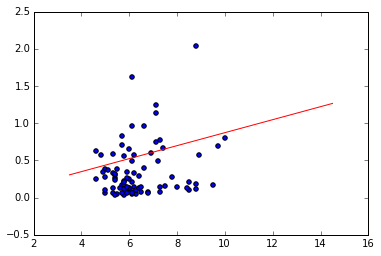

In [19]:
x=np.arange(3.5, 15.)
y=0.0873 * x 

plt.scatter(data['HbA1c'], data['BKHypBK'])
plt.plot(x, y, color='r')
#plt.savefig('StandardCurve.png', dpi=400)